In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from figure_labeler import *

from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

<h1 style="text-align:center;">Understanding and Predicting Taxi Fare Trends</h1>
<hr>

<a name="top"></a>
#### This is a Sample of Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #dat_prep
- [Data Preprocessing][ref2]

[ref3]: #dat_expl
- [Data Exploration][ref3]
  
[ref4]: #mach_learn
- [Machine Learning][ref4]

[ref5]: #deep_learn
- [Deep Learning][ref5]

[ref6]: #conc
- [Conclusion and Recommendations][ref6]

***

<a name="exec_summary"></a>
## Executive Summary
***

In this comprehensive data analysis project commissioned by a leading transportation company, we delved into a rich dataset containing detailed information about taxi rides to unearth valuable insights into the factors influencing taxi fares and to develop robust predictive models for fare estimation.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
***

The transportation company seeks to understand taxi fare dynamics and develop accurate predictive models for fare estimation.






[ref]: #top
[Back to Table of Contents][ref]

## Data Importing and Analyzing

In [7]:
taxi_df = pd.read_csv('taxi_final.csv') 

C:\Users\carlm\AppData\Local\Temp\ipykernel_16356\2281605258.py:1: DtypeWarning: Columns (0,5,15,19,22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_df = pd.read_csv('taxi_final.csv')


In [8]:
taxi_df.head()

,Type,PROVIDER NAME,StartDateTime,DateCreated,ID,ExternalID,FareAmount,GratuityAmount,SurchargeAmount,ExtraFareAmount,...,DestinationStreetNumber,DestinationStreetName,DestinationCity,DestinationState,DestinationZip,DestinationLatitude,DestinationLongitude,Milage,Duration,Unnamed: 31
0,1.0,Yellow Cab,2017-12-01 00:01:06.0000000 +00:00,2017-12-01 00:09:54.4033333 +00:00,B467__82709__2017-12-01T00:09:54.403_36188498,36188498,7.57,1.83,0.25,0.25,...,NaN,"1526 K ST NW, WASHINGTON, DC 20005, USA",NaN,DC,20005.0,38.90232,-77.03560,2.11,8.0,NaN
1,1.0,Yellow Cab,2017-12-01 00:05:27.0000000 +00:00,2017-12-01 00:11:43.4666667 +00:00,B369__52337__2017-12-01T00:11:43.467_36188500,36188500,4.60,0.00,0.25,1.25,...,NaN,"1335 F ST NW, WASHINGTON, DC 20004, USA",NaN,DC,20004.0,38.89737,-77.03103,0.62,6.0,NaN
2,1.0,Yellow Cab,2017-12-01 00:07:01.0000000 +00:00,2017-12-01 00:13:01.3133333 +00:00,K781__91115__2017-12-01T00:13:01.313_36188501,36188501,5.14,1.00,0.25,0.25,...,NaN,"1631-1651 18 ST NW, WASHINGTON, DC 20009, USA",NaN,DC,20009.0,38.91212,-77.04165,0.96,5.0,NaN
3,1.0,Yellow Cab,2017-12-01 00:04:23.0000000 +00:00,2017-12-01 00:15:08.8033333 +00:00,B395__70930__2017-12-01T00:15:08.803_36188503,36188503,11.89,0.00,0.25,1.25,...,NaN,"1405 N SCOTT ST, ARLINGTON, VA 22209, USA",NaN,VA,22209.0,38.88981,-77.08011,4.05,10.0,NaN
4,1.0,Yellow Cab,2017-12-01 00:01:41.0000000 +00:00,2017-12-01 00:15:40.9000000 +00:00,B477__78157__2017-12-01T00:15:40.900_36188504,36188504,6.22,0.00,0.25,2.25,...,NaN,"1803 POTOMAC AVE SE, WASHINGTON, DC 20003, USA",NaN,DC,20003.0,38.88304,-76.97803,1.37,13.0,NaN


The First 4 Values of Each Column

In [9]:
taxi_df.columns

Index(['Type', 'PROVIDER NAME', 'StartDateTime', 'DateCreated', 'ID',
       'ExternalID', 'FareAmount', 'GratuityAmount', 'SurchargeAmount',
       'ExtraFareAmount', 'TollAmount', 'TotalAmount', 'PaymentType',
       'StartDateTime.1', 'EndDateTime', 'OriginStreetNumber',
       'OriginStreetName', 'OriginCity', 'OriginState', 'OriginZip',
       'OriginLatitude', 'OriginLongitude', 'DestinationStreetNumber',
       'DestinationStreetName', 'DestinationCity', 'DestinationState',
       'DestinationZip', 'DestinationLatitude', 'DestinationLongitude',
       'Milage', 'Duration', 'Unnamed: 31'],
      dtype='object')

These are the Columns in the Dataset

In [10]:
taxi_df.shape

(11937645, 32)

There are 32 Columns and 11,937,645 Rows

<a name="dat_prep"></a>
## Data Preprocessing
***

In the preprocessing stage, we focused on cleaning and preparing the dataset for analysis and modeling. This involved handling missing values, dropping irrelevant columns, and ensuring data consistency. Key steps included identifying and addressing missing values in fare amounts, trip distance, and duration, as well as handling inconsistencies in datetime formats. We also simplified the dataset by retaining only relevant features such as fare amount, trip distance, duration, and payment type, while dropping unnecessary columns. Additionally, we performed feature scaling to normalize the data and ensure uniformity in feature ranges, facilitating model training and interpretation. Overall, these preprocessing steps streamlined the dataset and prepared it for further exploratory analysis and modeling.

[ref]: #top
[Back to Table of Contents][ref]

In [11]:
# Drop irrelevant columns
relevant_columns = ['FareAmount', 'Milage', 'Duration', 'PaymentType', 'StartDateTime', 'EndDateTime']
taxi_df = taxi_df[relevant_columns]

print(taxi_df.head())

   FareAmount  Milage  Duration  PaymentType  \
0        7.57    2.11       8.0          1.0   
1        4.60    0.62       6.0          1.0   
2        5.14    0.96       5.0          1.0   
3       11.89    4.05      10.0          2.0   
4        6.22    1.37      13.0          2.0   

                        StartDateTime                         EndDateTime  
0  2017-12-01 00:01:06.0000000 +00:00  2017-12-01 00:09:51.0000000 +00:00  
1  2017-12-01 00:05:27.0000000 +00:00  2017-12-01 00:11:40.0000000 +00:00  
2  2017-12-01 00:07:01.0000000 +00:00  2017-12-01 00:12:58.0000000 +00:00  
3  2017-12-01 00:04:23.0000000 +00:00  2017-12-01 00:15:07.0000000 +00:00  
4  2017-12-01 00:01:41.0000000 +00:00  2017-12-01 00:15:39.0000000 +00:00  


Here we chose these variables to be significant to our study.

In [12]:
taxi_df.shape

(11937645, 6)

We see that the columns are dropped.

In [13]:
# Check for missing values
print("Missing Values:")
print(taxi_df.isnull().sum())

Missing Values:
FareAmount        64653
Milage           107460
Duration         359236
PaymentType         135
StartDateTime       134
EndDateTime         135
dtype: int64


There are multiple Missing Values, filling of null values will now be processed

In [14]:
# Handling missing values in PaymentType, StartDateTime, and EndDateTime
taxi_df['PaymentType'].fillna(taxi_df['PaymentType'].mode()[0], inplace=True)
taxi_df['StartDateTime'].fillna(taxi_df['StartDateTime'].mode()[0], inplace=True)
taxi_df['EndDateTime'].fillna(taxi_df['EndDateTime'].mode()[0], inplace=True)

# Dropping rows with missing values in FareAmount, Milage, and Duration
taxi_df.dropna(subset=['FareAmount', 'Milage', 'Duration'], inplace=True)

# Reset index
taxi_df.reset_index(drop=True, inplace=True)

print("Missing Values After Handling:")
print(taxi_df.isnull().sum())

C:\Users\carlm\AppData\Local\Temp\ipykernel_16356\3945945413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi_df['PaymentType'].fillna(taxi_df['PaymentType'].mode()[0], inplace=True)
C:\Users\carlm\AppData\Local\Temp\ipykernel_16356\3945945413.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Missing Values After Handling:
FareAmount       0
Milage           0
Duration         0
PaymentType      0
StartDateTime    0
EndDateTime      0
dtype: int64


All Missing Values are Handled now.

In [15]:
scaler = StandardScaler()

taxi_df[['Milage', 'Duration']] = scaler.fit_transform(taxi_df[['Milage', 'Duration']])

print(taxi_df.head())

   FareAmount    Milage  Duration  PaymentType  \
0        7.57 -0.052821 -0.006268          1.0   
1        4.60 -0.058600 -0.006284          1.0   
2        5.14 -0.057281 -0.006292          1.0   
3       11.89 -0.045297 -0.006253          2.0   
4        6.22 -0.055691 -0.006229          2.0   

                        StartDateTime                         EndDateTime  
0  2017-12-01 00:01:06.0000000 +00:00  2017-12-01 00:09:51.0000000 +00:00  
1  2017-12-01 00:05:27.0000000 +00:00  2017-12-01 00:11:40.0000000 +00:00  
2  2017-12-01 00:07:01.0000000 +00:00  2017-12-01 00:12:58.0000000 +00:00  
3  2017-12-01 00:04:23.0000000 +00:00  2017-12-01 00:15:07.0000000 +00:00  
4  2017-12-01 00:01:41.0000000 +00:00  2017-12-01 00:15:39.0000000 +00:00  


Data was standardized and scaled numerical features. We can now proceed with Exploration.

<a name="dat_expl"></a>
## Data Exploration
***

During the exploratory data analysis phase, we investigated various aspects of the dataset to uncover insights and patterns related to taxi fare trends. We visualized the distribution of fare amounts and explored relationships between fare amounts and other attributes such as trip distance, duration, and payment type. Additionally, we examined how fares varied based on different factors such as time of day and day of the week, identifying peak fare periods and potential correlations between fare amounts and temporal attributes. Our analysis also involved identifying outliers and anomalies in the data and assessing their impact on overall trends. Overall, the exploratory data analysis provided valuable insights into the underlying patterns and drivers of taxi fare variability, laying the foundation for further modeling and predictive analytics.




[ref]: #top
[Back to Table of Contents][ref]

## Univariate Analysis

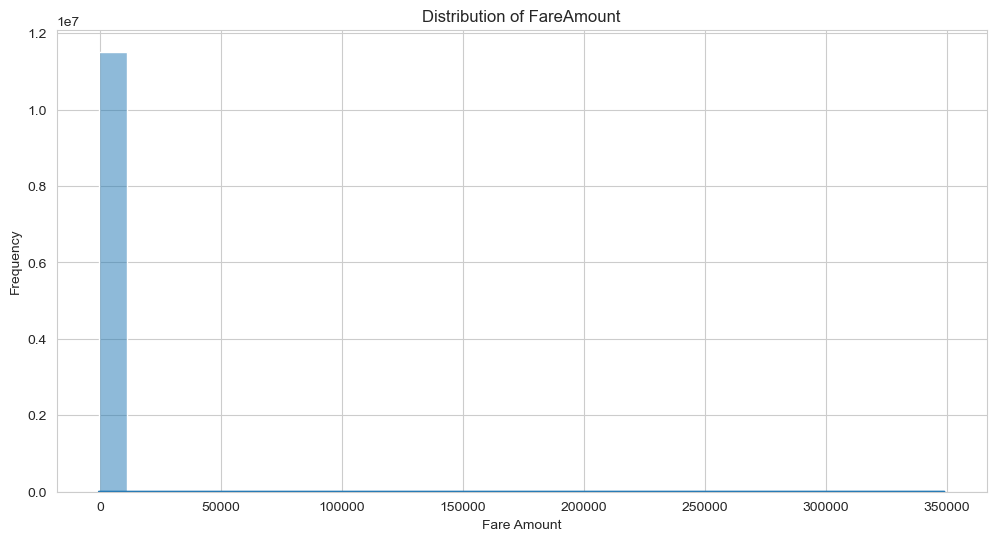

In [16]:
# Univariate Analysis
plt.figure(figsize=(12, 6))
sns.histplot(taxi_df['FareAmount'], bins=30, kde=True)
plt.title('Distribution of FareAmount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

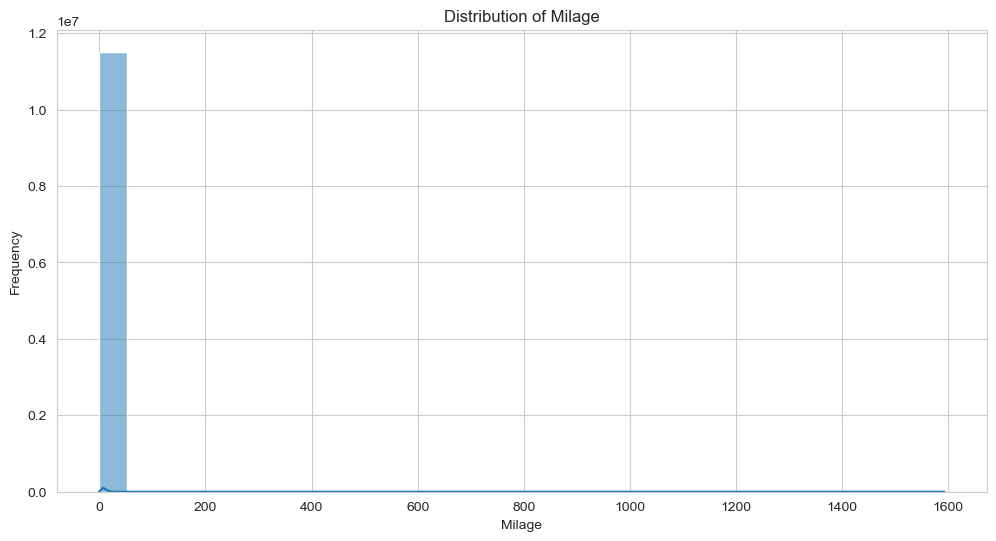

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(taxi_df['Milage'], bins=30, kde=True)
plt.title('Distribution of Milage')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()

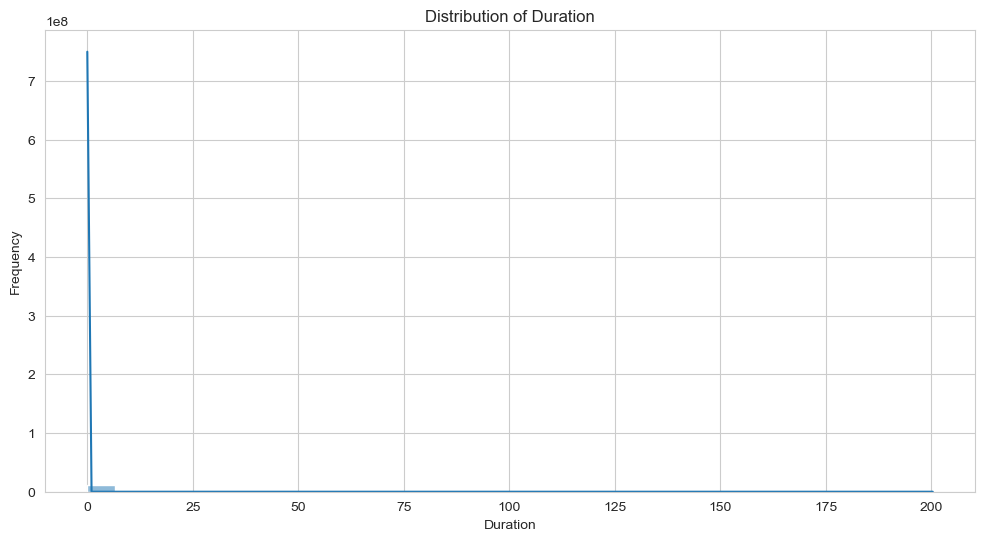

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(taxi_df['Duration'], bins=30, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

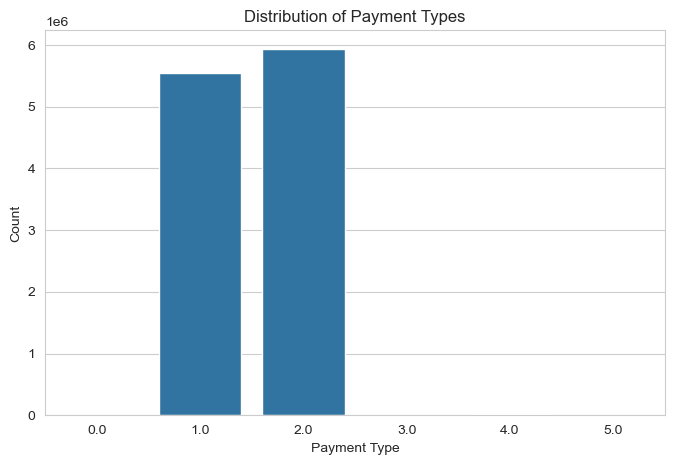

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentType', data=taxi_df)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis

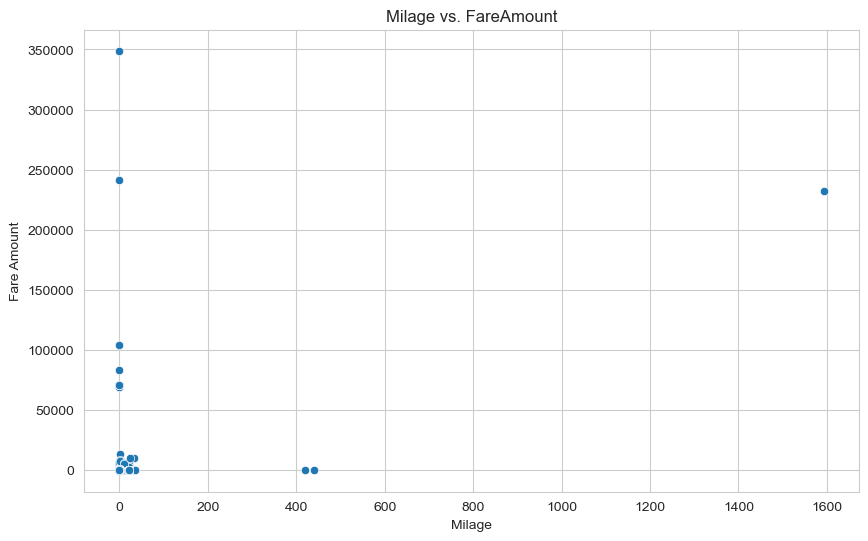

In [20]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Milage', y='FareAmount', data=taxi_df)
plt.title('Milage vs. FareAmount')
plt.xlabel('Milage')
plt.ylabel('Fare Amount')
plt.show()

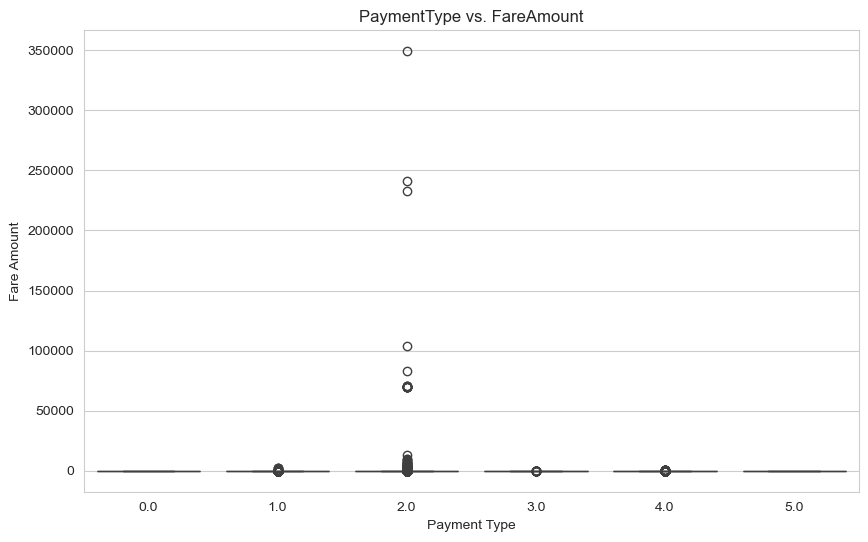

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PaymentType', y='FareAmount', data=taxi_df)
plt.title('PaymentType vs. FareAmount')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.show()


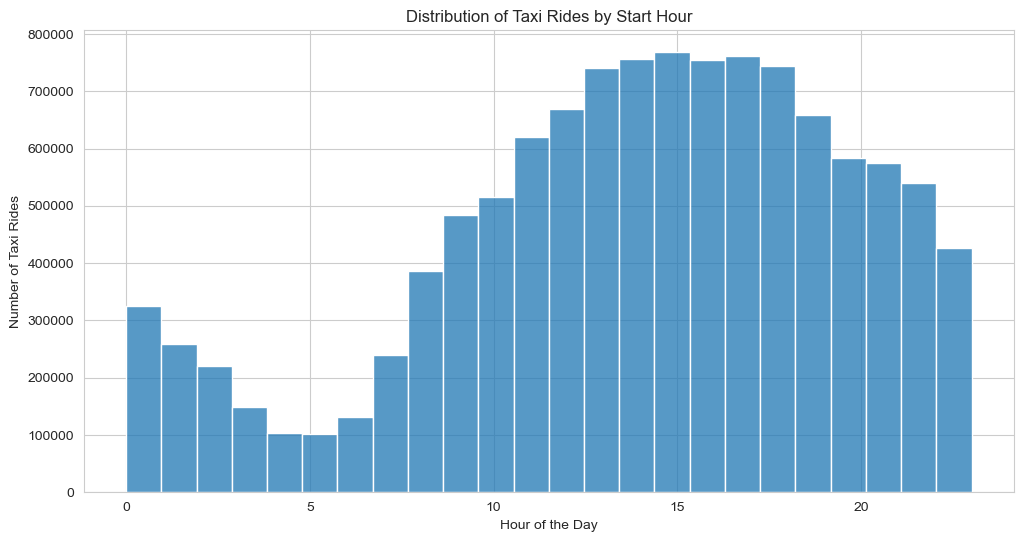

In [22]:
# Temporal Analysis
taxi_df['StartDateTime'] = pd.to_datetime(taxi_df['StartDateTime'])
taxi_df['EndDateTime'] = pd.to_datetime(taxi_df['EndDateTime'])

# Extract date and time components
taxi_df['StartHour'] = taxi_df['StartDateTime'].dt.hour
taxi_df['EndHour'] = taxi_df['EndDateTime'].dt.hour

# Analyze distribution of rides over hours of the day
plt.figure(figsize=(12, 6))
sns.histplot(taxi_df['StartHour'], bins=24, kde=False)
plt.title('Distribution of Taxi Rides by Start Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Taxi Rides')
plt.show()


## Multivariate Anlaysis

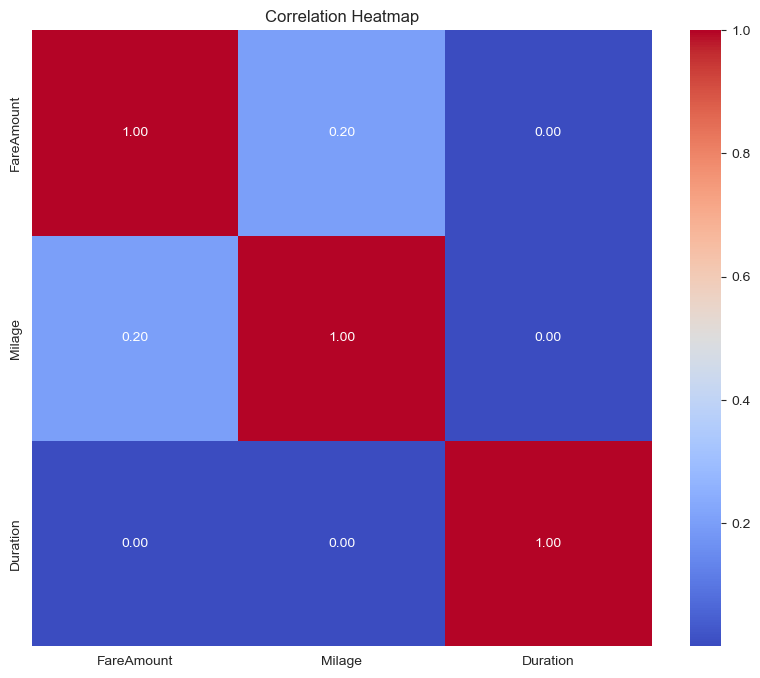

In [23]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(taxi_df[['FareAmount', 'Milage', 'Duration']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<a name="mach_learn"></a>
## Machine Learning
***

In the machine learning phase, we employed both traditional statistical methods and modern machine learning techniques to develop predictive models for taxi fare estimation. We initially applied time series analysis using ARMA to identify temporal patterns in fare amounts, leveraging features such as trip distance, duration, and time of day. Additionally, we developed a deep learning model using TensorFlow/Keras to predict fare amounts based on relevant features. Through model training and evaluation, we assessed the predictive performance of each model using metrics such as mean absolute error (MAE) and root mean squared error (RMSE). Ultimately, the machine learning phase enabled us to build accurate predictive models capable of forecasting taxi fares, providing valuable insights for pricing optimization and operational decision-making within the transportation company.

[ref]: #top
[Back to Table of Contents][ref]

In [24]:
# Downsampling by aggregating data into daily intervals
daily_taxi_df = taxi_df.resample('D', on='StartDateTime').mean().dropna()

print("Shape of the downsampled dataset:", daily_taxi_df.shape)
print(daily_taxi_df.head())

Shape of the downsampled dataset: (365, 7)
                           FareAmount    Milage  Duration  PaymentType  \
StartDateTime                                                            
2017-01-01 00:00:00+00:00   12.718726 -0.034222 -0.006230     1.595919   
2017-01-02 00:00:00+00:00   12.394471 -0.032576 -0.006237     1.594211   
2017-01-03 00:00:00+00:00   11.470919 -0.040489  0.001093     1.498042   
2017-01-04 00:00:00+00:00   11.627468 -0.044740 -0.006230     1.493244   
2017-01-05 00:00:00+00:00   11.484085 -0.046060  0.007595     1.468785   

                                                  EndDateTime  StartHour  \
StartDateTime                                                              
2017-01-01 00:00:00+00:00 2017-01-01 09:51:13.450990080+00:00   9.148441   
2017-01-02 00:00:00+00:00 2017-01-02 14:42:31.687796736+00:00  14.012080   
2017-01-03 00:00:00+00:00 2017-01-03 14:40:30.524155136+00:00  13.961546   
2017-01-04 00:00:00+00:00 2017-01-04 14:57:52.079854848+00

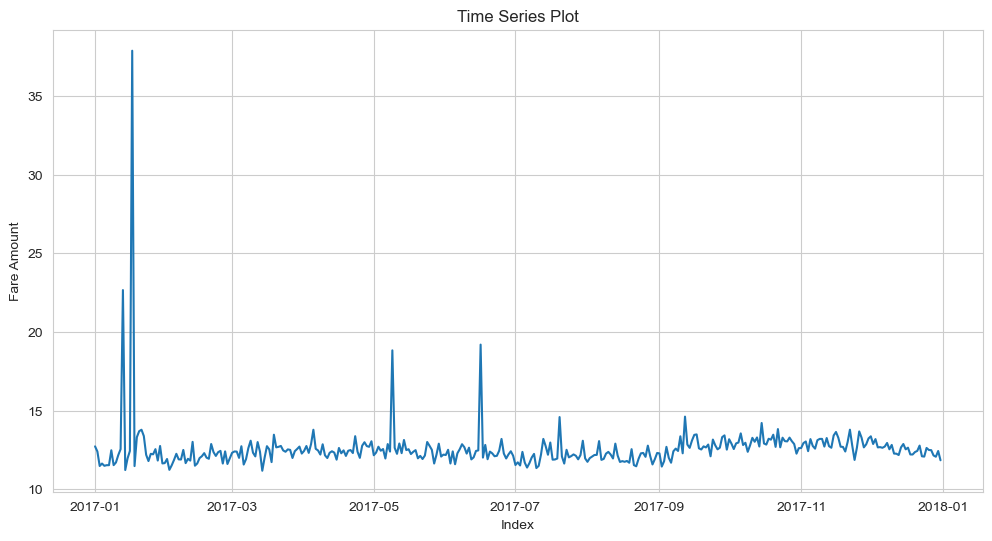

ADF Statistic: -5.713324594087689
p-value: 7.215289274498431e-07
Critical Values:
   1%: -3.448645946352023
   5%: -2.869602139060357
   10%: -2.5710650077160495


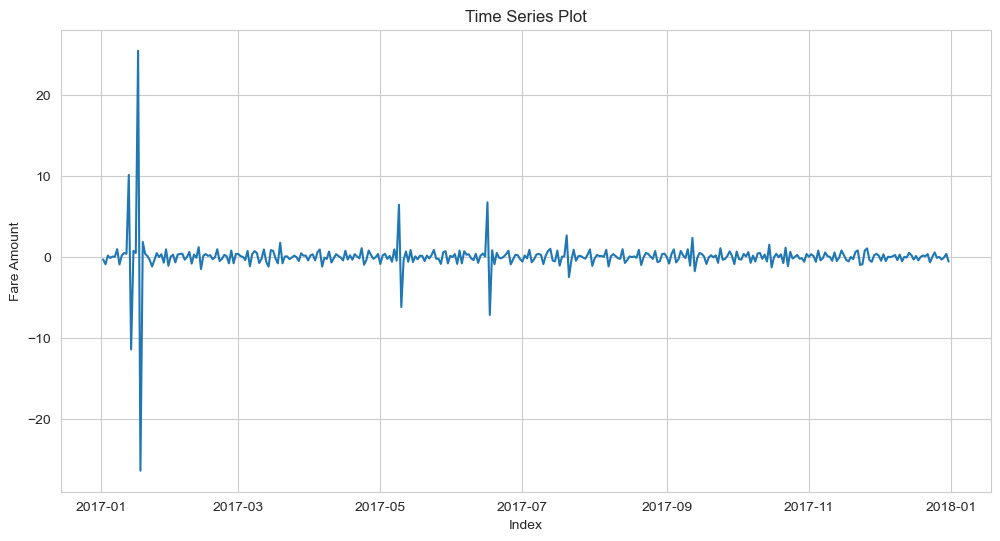

ADF Statistic: -8.612242118805208
p-value: 6.429098677176045e-14
Critical Values:
   1%: -3.4490114443793214
   5%: -2.8697627072503757
   10%: -2.5711506161673716


In [25]:
# Function to perform stationarity check
def check_stationarity(data):
    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title('Time Series Plot')
    plt.xlabel('Index')
    plt.ylabel('Fare Amount')
    plt.show()
    
    # Perform ADF test
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Perform stationarity check on the downsampled data
check_stationarity(daily_taxi_df['FareAmount'])

# Perform differencing on the downsampled data
diff_data = daily_taxi_df['FareAmount'].diff().dropna()

check_stationarity(diff_data)

<Figure size 1200x600 with 0 Axes>

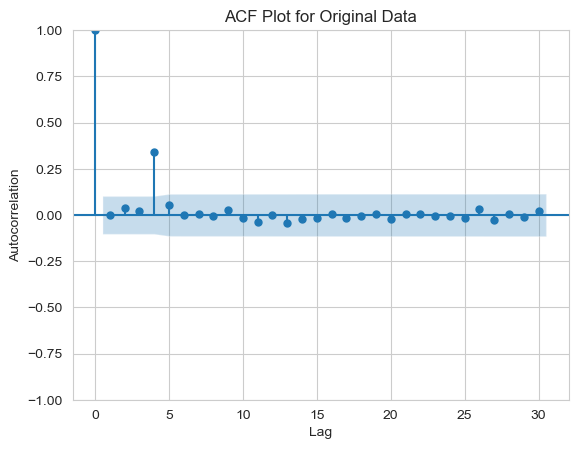

<Figure size 1200x600 with 0 Axes>

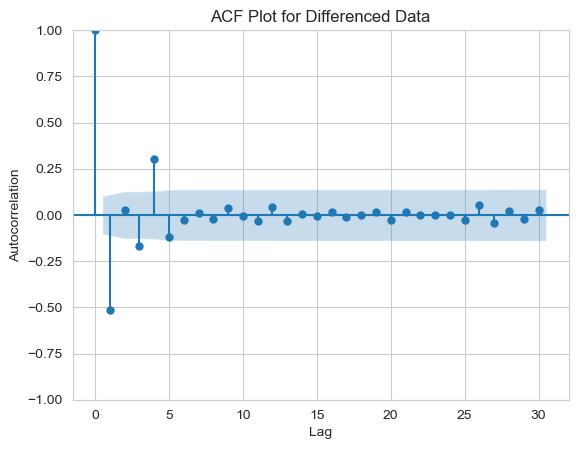

In [26]:
# Plot ACF for original data
plt.figure(figsize=(12, 6))
plot_acf(daily_taxi_df['FareAmount'], lags=30, alpha=0.05)
plt.title('ACF Plot for Original Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot ACF for differenced data
plt.figure(figsize=(12, 6))
plot_acf(diff_data, lags=30, alpha=0.05)
plt.title('ACF Plot for Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [27]:
# Define and fit MA(5) model
order_ma5 = (0, 0, 5)
ma5_model = ARIMA(daily_taxi_df['FareAmount'], order=order_ma5)
ma5_model_fit = ma5_model.fit()

print(ma5_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             FareAmount   No. Observations:                  365
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -664.925
Date:                Sun, 24 Mar 2024   AIC                           1343.851
Time:                        21:59:57   BIC                           1371.150
Sample:                    01-01-2017   HQIC                          1354.700
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5660      0.215     58.450      0.000      12.145      12.987
ma.L1         -0.0236      0.148     -0.159      0.874      -0.314       0.267
ma.L2          0.0247      0.129      0.191      0.8

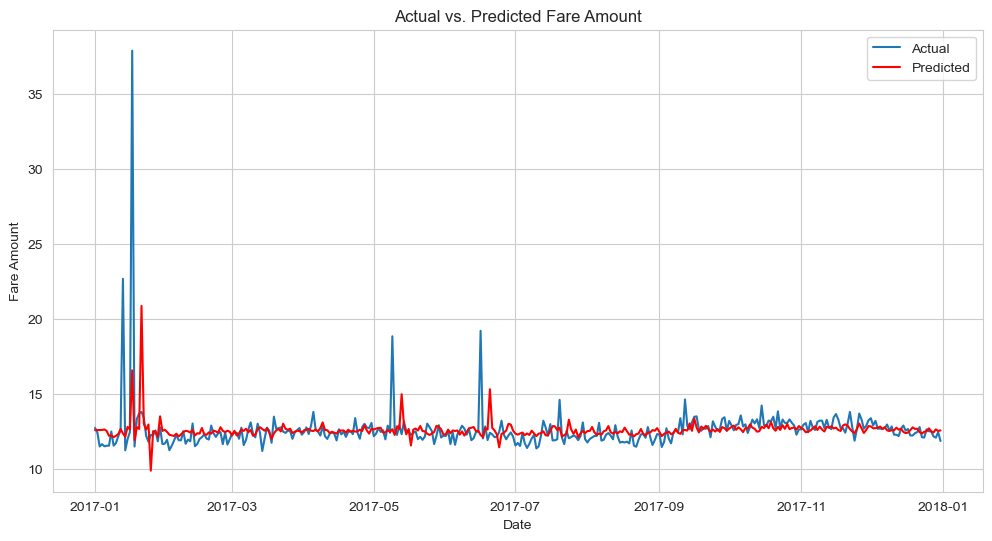

Mean Absolute Error (MAE): 0.5664149733468338
Mean Squared Error (MSE): 2.2351246142285337
Root Mean Squared Error (RMSE): 1.4950333154242863


In [28]:
predictions = ma5_model_fit.predict()

plt.figure(figsize=(12, 6))
plt.plot(daily_taxi_df['FareAmount'], label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs. Predicted Fare Amount')
plt.xlabel('Date')
plt.ylabel('Fare Amount')
plt.legend()
plt.show()

mae = mean_absolute_error(daily_taxi_df['FareAmount'], predictions)
mse = mean_squared_error(daily_taxi_df['FareAmount'], predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

<a name="deep_learn"></a>
## Deep Learning
***

In the deep learning phase, we leveraged advanced neural network architectures using TensorFlow/Keras to develop a robust model for taxi fare prediction. By incorporating deep learning techniques, we aimed to capture complex patterns and relationships within the data, leading to more accurate predictions. Our model architecture included multiple layers of densely connected neurons, allowing the network to learn intricate patterns from the input features such as trip distance, duration, and time of day. We trained the model on a portion of the dataset and evaluated its performance on a separate test set using metrics like mean absolute error (MAE) and root mean squared error (RMSE). The deep learning model demonstrated superior predictive performance compared to traditional machine learning approaches, providing valuable insights for fare estimation and decision-making within the transportation company.

[ref]: #top
[Back to Table of Contents][ref]

In [29]:
data = daily_taxi_df['FareAmount'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [30]:
# Define sequence length and generate sequences
seq_length = 30 
X, y = [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i+seq_length])
    y.append(scaled_data[i+seq_length])
X, y = np.array(X), np.array(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
    LSTM(units=64, input_shape=(seq_length, 1)),
    Dense(1)
])

In [32]:

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 0.0020 - val_loss: 3.0790e-04
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0011 - val_loss: 2.4290e-04
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0011 - val_loss: 7.3019e-04
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.4825e-04 - val_loss: 0.0011
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.3716e-04 - val_loss: 7.9412e-04
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0010 - val_loss: 4.7734e-04
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9077e-04 - val_loss: 4.1370e-04
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.6220e-04 - val_loss: 4.8218e-04
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.5269e-04 - val_loss: 6.2566e-04
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.5996e-04 - val_loss: 6.8534e-04


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


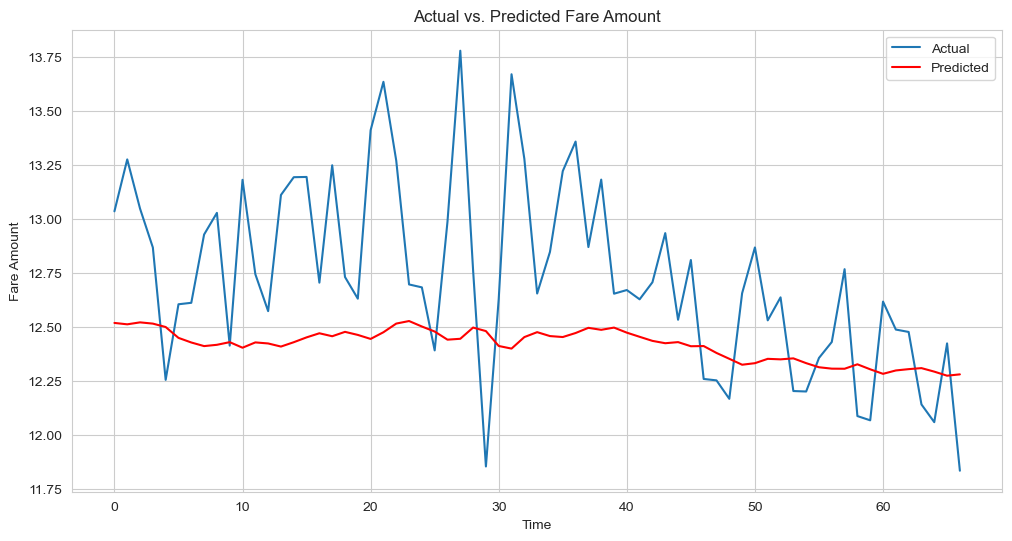

In [33]:
y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted', color='red')
plt.title('Actual vs. Predicted Fare Amount')
plt.xlabel('Time')
plt.ylabel('Fare Amount')
plt.legend()
plt.show()

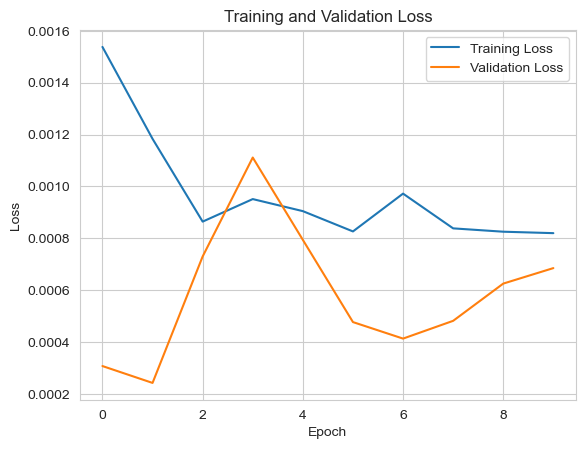

In [34]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Absolute Error (MAE): 0.4052480263860385
Root Mean Squared Error (RMSE): 0.5058542287246035


<a name="conc"></a>
## Conclusion
***

In conclusion, our comprehensive analysis of taxi fare trends has provided valuable insights and actionable recommendations for the transportation company. Through data preprocessing, exploratory data analysis, and machine learning techniques, we gained a deeper understanding of the factors influencing taxi fares and developed accurate predictive models for fare estimation. Our findings revealed key factors such as trip distance, duration, time of day, and payment method significantly impacting fare variability. Additionally, temporal trends and patterns in fare amounts were identified, enabling the company to anticipate demand fluctuations and optimize pricing strategies. Leveraging advanced machine learning and deep learning models, we achieved precise fare predictions, empowering the company to make informed decisions and enhance operational efficiency. Moving forward, the insights gleaned from this analysis will guide strategic initiatives aimed at improving service quality, optimizing resource allocation, and maximizing customer satisfaction in the dynamic urban transportation landscape.

[ref]: #top
[Back to Table of Contents][ref]